In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.interpolate import interp1d
# import os
import sys
# import numpy as np
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt    
import pickle
# import matplotlib.patches as mpatches
# from statsmodels.graphics.mosaicplot import mosaic
# from tabulate import tabulate
# import seaborn as sns

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *

sys.path.insert(1, '../../ProcessEvents')
from Create_Profiles_Functions import *

In [2]:
color_mapping_seasons = {
    'Summer': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Winter': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

color_mapping_timeperiod = {
    'Present': (1.0, 0.6471, 0.0, 0.6), # orange with 0.6 alpha
    'Future': (0.0, 0.0, 1.0, 0.6)}     # blue with 0.6 alpha}

n= 5
quintile_cats_season = ['Winter', 'Summer']

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

# Read in data
For events with n data points which is a multiple of 5

ADD THIS dataframes['bc006']['Loading_profile_molly'] = dataframes['bc006']['max_quintile_molly'].map(quintile_mapping)

In [3]:
# Define the list of identifiers
ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211',
       #'bb216',
       'bb219','bb222','bb225']

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

In [37]:
with open("/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/All_30mins/dataframes_inclnulls.pkl", 'rb') as file:
    dataframes_inclnulls = pickle.load(file)  

In [14]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)

### Create dataframes for plotting boxplots

In [35]:
combined_df_seasons = prepare_combined_data(dataframes_inclnulls, 'season', ids, present_future_lookup)

## Mosaic plot showing summer/winter split for each year individually

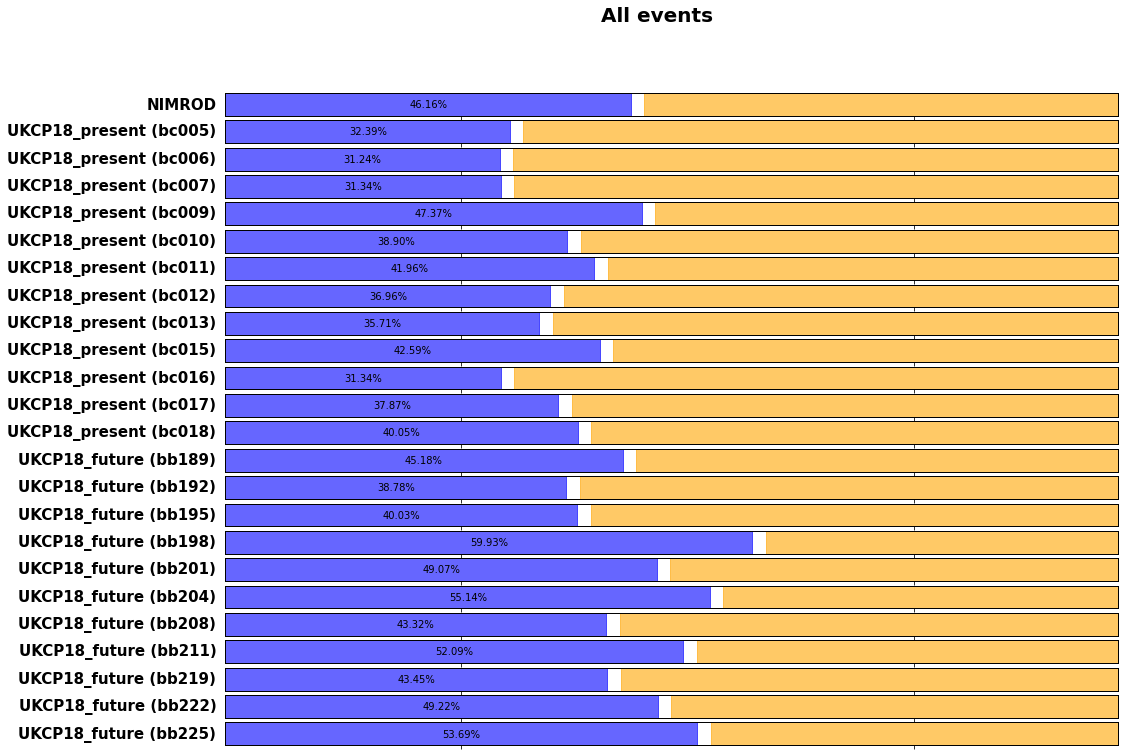

In [15]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(
        axs[i], dataframes[id], 'season', quintile_cats_season, color_mapping_seasons,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20);

# Boxplots showing seasonal distribution across all ensemble members
1. In the present day: there are more many more AMAX producing storms in summer than winter. In the future, the number of AMAX producing storms in summer and winter is more similar
2. 

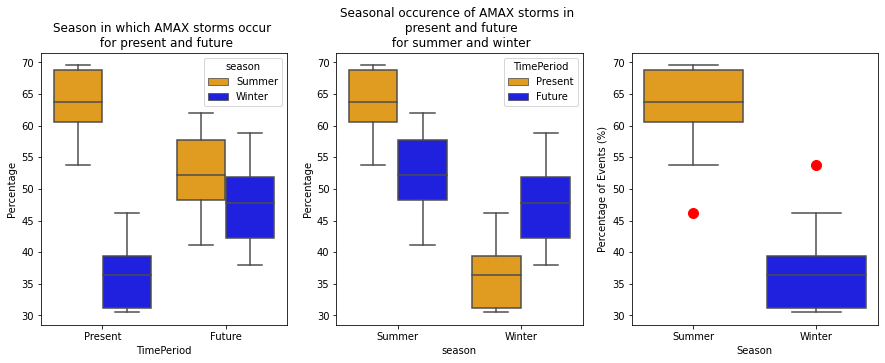

In [36]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.boxplot(ax=axs[0],data=combined_df_seasons, x='TimePeriod', y='Percentage', hue='season',
#             order=quintile_cats_season,
                palette =color_mapping_seasons);
axs[0].set_title('Season in which AMAX storms occur \n for present and future')

sns.boxplot(ax=axs[1],data=combined_df_seasons, x='season', y='Percentage', hue='TimePeriod',
                palette =color_mapping_timeperiod);
axs[1].set_title('Seasonal occurence of AMAX storms in \n present and future\n for summer and winter')

combined_df_seasons_present =combined_df_seasons[combined_df_seasons['TimePeriod']=='Present']     
# Create the box plot for the UKCP18 ensemble members' percentages
sns.boxplot(x='season', y='Percentage', data=combined_df_seasons_present, ax=axs[2], 
           palette=color_mapping_seasons, showmeans=False)

# Overlay the Nimrod values as percentage points
nimrod_data = dataframes['nimrod']['season'].value_counts(normalize=True).reindex(quintile_cats_season, fill_value=0)
nimrod_values = nimrod_data.index
nimrod_percentages = nimrod_data.values * 100  # Convert to percentage

# Plot the Nimrod values
for i, category in enumerate(nimrod_values):
    nimrod_percentage = nimrod_percentages[i]
    axs[2].scatter(i, nimrod_percentage, color='red', s=100, zorder=5, label='NIMROD' if i == 0 else "")

# Add titles and labels
# axs[2].set_title('Comparison of seasonal split between \n UKCP18 Ensembles and NIMROD',fontweight='bold')
axs[2].set_xlabel('Season')
axs[2].set_ylabel('Percentage of Events (%)');

# Broken down by duration

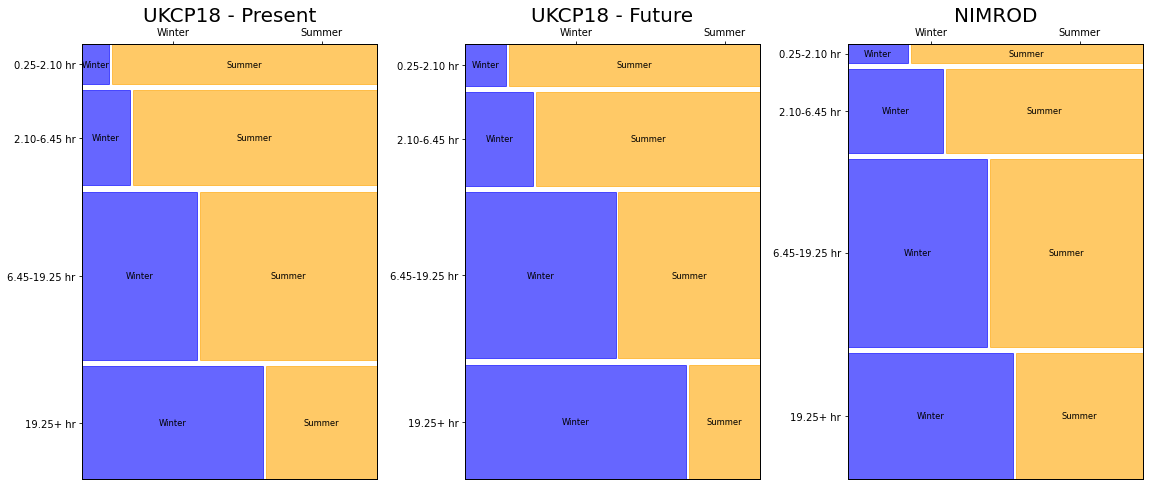

In [722]:
fig, axs = plt.subplots(ncols =3, figsize=(19,8))
fig.subplots_adjust(wspace=0.3)
create_mosaic_plot(axs[0],present_dataframes , quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[0].set_title('UKCP18 - Present', fontsize=20)
create_mosaic_plot(axs[1],future_dataframes , quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[1].set_title('UKCP18 - Future', fontsize=20)
create_mosaic_plot(axs[2],dataframes['nimrod'], quintile_cats_season, cross_variable1 = 'DurationRange_notpersonalised', 
                   cross_variable2='season')
axs[2].set_title('NIMROD', fontsize=20);